In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

In [3]:
dank_data = pd.read_json("../image_analysis/dank_cleaned2.json")

In [4]:
dank_data.shape

(24115, 26)

In [5]:
dank_data = dank_data.dropna()

In [6]:
words_count = {}
for words in dank_data['processed_words']:
    for word in words:
        if word not in words_count:
            words_count[word] = 1
        else:
            words_count[word] += 1

In [7]:
words_count
top_ten = list({k: v for k, v in sorted(words_count.items(), key = lambda item: item[1], reverse=True)}.keys())[0:10]

In [8]:
for w in top_ten:
    dank_data[w] = pd.Series(np.zeros(24115, dtype=int))

In [9]:
dank_data

,author,awards,created_utc,text_from_image,words,processed_words,downs,id,is_nsfw,media,...,meme,reddit,coronavirus,like,toilet,paper,corona,peopl,post,time
1,L71U,[],1584295514,NICE DICK\r\n,Ricardo😎NICE DICK\r\n,"[ricardo, nice, dick]",0,fj5ixk,False,https://i.redd.it/w6acm47gmvm41.jpg,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Awesome-ness5,[],1584294841,Nvidia's calling on gaming PC owners to\r\nput...,Gamers AssembleNvidia's calling on gaming PC o...,"[gamer, assemblenvidia, call, game, owner, sys...",0,fj5bzj,False,https://i.redd.it/bqawbb5gkvm41.jpg,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,notaspop,[],1584293653,When you post a low-effort meme\r\nfor fun to ...,I mean.... Not Corona time?When you post a low...,"[mean, corona, time, post, effort, meme, peopl...",0,fj50df,False,https://i.redd.it/v5pea6wwgvm41.jpg,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Gaunja420,[],1584293617,H A p pyt1A\r\n,WheNH A p pyt1A\r\n,[whenh],0,fj501g,False,https://i.redd.it/809pja1tgvm41.gif,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,In_An_Elmo_Cult,[],1584293448,All of the internet:\r\nHe •I've seen this one...,.All of the internet:\r\nHe •I've seen this on...,"[internet, see, internet, explor, whatdo, mean...",0,fj4ycc,False,https://i.redd.it/hakptfr2gvm41.png,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38026,Caramelboi37,[],1584120545,"Add one word and repost this, soon we Will\r\n...","PleaseAdd one word and repost this, soon we Wi...","[pleaseadd, word, repost, soon, greatest, shor...",0,fi3c0z,False,https://i.redd.it/pwcwyle66hm41.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38029,KyleSirTalksAlotYT,[],1584120533,When you can't find the original\r\nThanos quo...,I watched this episode and thought I could use...,"[watch, episod, think, meme, origin, thano, qu...",0,fi3bxg,False,https://i.redd.it/xyowc7756hm41.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38032,Joeniek,[],1584120516,UVE\r\nBREAKING NEWS\r\nCOVID-19 FOUND IN TOIL...,Look at thatUVE\r\nBREAKING NEWS\r\nCOVID-19 F...,"[look, thatuv, break, news, covid, toilet, pap...",0,fi3bsv,False,https://i.redd.it/1qv2uk936hm41.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38033,5k3tchy,[],1584120513,When I remind myself about\r\ncompliment that ...,That made me feel good about myself.When I rem...,"[feel, good, remind, compliment, tell, year]",0,fi3bru,False,https://i.redd.it/pi0wpta26hm41.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
def normalize(x):
    return x['ups'] / x['subscribers']

dank_data['ups_normed'] = dank_data.apply(normalize, axis=1)
dank_data['ups_normed']

1        4.709897e-05
2        1.480253e-05
7        1.345685e-06
8        1.345685e-06
9        1.345685e-06
             ...     
38026    1.051794e-07
38029    4.943432e-06
38032    1.220081e-05
38033    2.103588e-06
38034    9.466146e-07
Name: ups_normed, Length: 24115, dtype: float64

In [11]:
def f(x):
    return int(x['is_nsfw'])

dank_data['is_nsfw'] = dank_data.apply(f, axis=1)
dank_data['is_nsfw']

1        0
2        0
7        0
8        0
9        0
        ..
38026    0
38029    0
38032    0
38033    0
38034    0
Name: is_nsfw, Length: 24115, dtype: int64

In [12]:
dank_data.shape

(24115, 37)

In [13]:
dank_data["subreddit"].unique()

array(['r/dank_meme', 'r/dankmeme', 'r/me_irl', 'r/MemeEconomy',
       'r/memes'], dtype=object)

In [14]:
dank_data = dank_data.drop(columns = ["id", "ups","downs", "words", "text_from_image","media", "url", "awards", "author", "title"])

Convert thumbnail column to binary data column that indicates whether the thumbnail is default or not.

In [15]:
mapping = {"r/me_irl":0, "r/dank_meme":1, "r/dankmeme":2, "r/MemeEconomy":3, "r/memes":4}

dank_data["thumbnail.thumbnail"] = [int(t == "default") for t in dank_data["thumbnail.thumbnail"]]
dank_data["subreddit"] = dank_data["subreddit"].map(mapping)

Convert processed words column to TF-IDF vector to gain understanding of the words' contribution to popularity. 

In [16]:
def set_ten(word_check):
    def top_ten_words(x):
        for word in x['processed_words']:
            if word == word_check:
                return 1
        return 0
                
                
    dank_data[word_check] = dank_data.apply(top_ten_words, axis=1)
for word in top_ten:
    set_ten(word)
dank_data

,created_utc,processed_words,is_nsfw,subreddit,subscribers,thumbnail.height,thumbnail.thumbnail,thumbnail.width,avg_hue,avg_saturation,...,reddit,coronavirus,like,toilet,paper,corona,peopl,post,time,ups_normed
1,1584295514,"[ricardo, nice, dick]",0,1,743116,136,0,140,30.615726,54.625239,...,0,0,0,0,0,0,0,0,0,4.709897e-05
2,1584294841,"[gamer, assemblenvidia, call, game, owner, sys...",0,1,743116,140,0,140,24.111360,54.654363,...,0,0,0,0,0,0,0,0,0,1.480253e-05
7,1584293653,"[mean, corona, time, post, effort, meme, peopl...",0,1,743116,140,1,140,24.042466,31.159050,...,0,0,0,0,0,1,1,1,1,1.345685e-06
8,1584293617,[whenh],0,1,743116,140,1,140,44.428757,66.669514,...,0,0,0,0,0,0,0,0,0,1.345685e-06
9,1584293448,"[internet, see, internet, explor, whatdo, mean...",0,1,743116,140,1,140,15.506512,27.647186,...,0,0,0,0,0,0,0,0,0,1.345685e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38026,1584120545,"[pleaseadd, word, repost, soon, greatest, shor...",0,4,9507565,125,1,140,36.669186,55.179987,...,0,0,0,0,0,0,0,0,0,1.051794e-07
38029,1584120533,"[watch, episod, think, meme, origin, thano, qu...",0,4,9507565,99,0,140,39.328894,78.810628,...,0,0,0,0,0,0,0,0,0,4.943432e-06
38032,1584120516,"[look, thatuv, break, news, covid, toilet, pap...",0,4,9507565,140,0,140,12.169112,67.386601,...,0,0,0,1,1,0,0,0,0,1.220081e-05
38033,1584120513,"[feel, good, remind, compliment, tell, year]",0,4,9507565,140,0,140,54.032949,18.939318,...,0,0,0,0,0,0,0,0,0,2.103588e-06


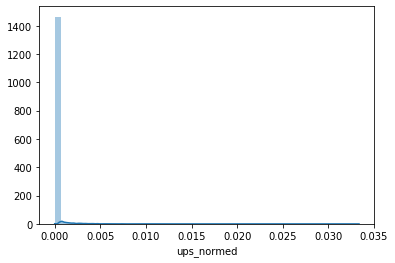

In [17]:
sns.distplot(dank_data["ups_normed"])

In [18]:
def threshold(x):
    if x['ups_normed'] < 0.00005: return 0
    else: return 1

dank_data['dank'] = dank_data.apply(threshold, axis=1)

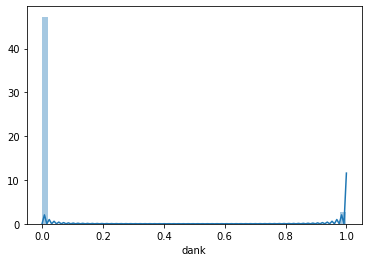

In [19]:
sns.distplot(dank_data["dank"])

In [20]:
dank_data = dank_data.drop(columns=["ups_normed", "processed_words"])

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X, y = dank_data.drop(columns=["dank"]), dank_data["dank"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Compare different parameter selections for GradientBoostingClassifier on dataset.

In [23]:
def make_model_and_score(loss, learning_rate, n_estimators, subsample, criterion, max_depth, random_state, verbose, validation_fraction):
    model = GradientBoostingClassifier(loss=loss, learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, criterion=criterion, max_depth=max_depth, random_state=random_state, verbose=verbose, validation_fraction=validation_fraction)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    return score

In [24]:
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, cross_val_score

Help from the following link: https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/

In [25]:
def make_model(loss, learning_rate, n_estimators, subsample, criterion, max_depth, random_state, verbose, validation_fraction, min_samples_split=500, min_samples_leaf=50, max_features='sqrt'):
    return GradientBoostingClassifier(loss=loss, learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, criterion=criterion, max_depth=max_depth, random_state=random_state, verbose=verbose, validation_fraction=validation_fraction, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_features=max_features)

def model_fit(model, printFeatureImportance=True, cv_folds=5):
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    cv_score = cross_val_score(model, X_train, y_train, cv=cv_folds)
    
    print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    if printFeatureImportance:
        feat_imp = pd.Series(model.feature_importances_, X_train.columns).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

In [26]:
model = make_model("exponential", 0.2, 150, 0.8, "friedman_mse", 5, 42, 1.0, 0.1)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.4521           0.0017            1.78s
         2           0.4515           0.0029            1.85s
         3           0.4367           0.0032            2.00s
         4           0.4412          -0.0002            1.86s
         5           0.4331           0.0019            1.85s
         6           0.4322           0.0013            1.80s
         7           0.4340           0.0001            1.79s
         8           0.4287           0.0016            1.79s
         9           0.4217           0.0011            1.77s
        10           0.4218          -0.0012            1.70s
        20           0.4049          -0.0003            1.56s
        30           0.3922          -0.0003            1.39s
        40           0.3847           0.0002            1.26s
        50           0.3711          -0.0019            1.14s
        60           0.3652          -0.0010            1.00s
       

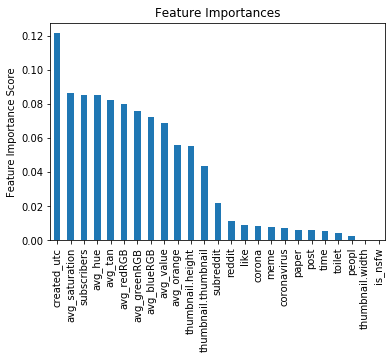

In [27]:
model_fit(model)

In [28]:
def make_model_tuning(loss, learning_rate, subsample, criterion, max_depth, random_state, verbose, validation_fraction, min_samples_split=500, min_samples_leaf=50, max_features='sqrt'):
    return GradientBoostingClassifier(loss=loss, learning_rate=learning_rate, subsample=subsample, criterion=criterion, max_depth=max_depth, random_state=random_state, verbose=verbose, validation_fraction=validation_fraction, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_features=max_features)

In [29]:
def gridSearch(estimator, param_grid, scoring="roc_auc", n_jobs=4, cv=5):
    gsearch = GridSearchCV(estimator=estimator, param_grid=param_grid, scoring=scoring, n_jobs=n_jobs, iid=False, cv=cv, return_train_score=True)
    gsearch.fit(X_train, y_train)
    return gsearch

In [30]:
param_test1 = {'n_estimators':range(20,81,10)}
model_tuning = make_model_tuning("exponential", 0.2, 0.8, "mse", 5, 42, 1.0, 0.1)
gs1 = gridSearch(model_tuning, param_grid=param_test1)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.4521           0.0017            0.17s
         2           0.4515           0.0029            0.17s
         3           0.4367           0.0032            0.16s
         4           0.4412          -0.0002            0.16s
         5           0.4331           0.0019            0.15s
         6           0.4322           0.0013            0.14s
         7           0.4340           0.0001            0.14s
         8           0.4287           0.0016            0.13s
         9           0.4217           0.0011            0.12s
        10           0.4218          -0.0012            0.11s
        20           0.4049          -0.0003            0.00s


In [31]:
gs1.cv_results_

{'mean_fit_time': array([0.46455827, 0.61216125, 0.76994977, 0.92392406, 1.0952692 ,
        1.26541748, 1.32465334]),
 'std_fit_time': array([0.00395883, 0.02989077, 0.01962787, 0.01888504, 0.01197483,
        0.02805539, 0.13609471]),
 'mean_score_time': array([0.01157022, 0.01136708, 0.01096334, 0.01316814, 0.01536231,
        0.01515446, 0.01536345]),
 'std_score_time': array([0.00439898, 0.00135107, 0.00140755, 0.00146631, 0.002416  ,
        0.00074061, 0.00204642]),
 'param_n_estimators': masked_array(data=[20, 30, 40, 50, 60, 70, 80],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 20},
  {'n_estimators': 30},
  {'n_estimators': 40},
  {'n_estimators': 50},
  {'n_estimators': 60},
  {'n_estimators': 70},
  {'n_estimators': 80}],
 'split0_test_score': array([0.65644982, 0.64151362, 0.65132208, 0.64575561, 0.64487539,
        0.64406047, 0.64919649]),
 'split1_test_score': array

In [32]:
gs1.best_params_

{'n_estimators': 20}

In [33]:
gs1.best_score_

0.6523951997959162

In [34]:
model_tuning_2 = GradientBoostingClassifier(loss="exponential", learning_rate=0.2, subsample=0.8, criterion="mse", random_state=42, verbose=1.0, validation_fraction=0.1, n_estimators=20, max_features='sqrt')
model_tuning_2.fit(X_train, y_train)
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gs2 = gridSearch(model_tuning_2, param_grid=param_test2)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.4532           0.0011            0.17s
         2           0.4543           0.0022            0.13s
         3           0.4416           0.0026            0.15s
         4           0.4453           0.0003            0.14s
         5           0.4415          -0.0002            0.13s
         6           0.4413           0.0025            0.11s
         7           0.4457           0.0012            0.11s
         8           0.4416           0.0017            0.10s
         9           0.4367           0.0003            0.09s
        10           0.4371           0.0002            0.08s
        20           0.4257           0.0001            0.00s
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.4502           0.0026            0.25s
         2           0.4483           0.0032            0.25s
         3           0.4343           0.0038            0.27s
      

In [35]:
gs2.cv_results_

{'mean_fit_time': array([0.46774545, 0.44680552, 0.43224673, 0.40950646, 0.4091063 ,
        0.62732468, 0.55551262, 0.54374528, 0.50963888, 0.49586935,
        0.78509736, 0.69414411, 0.65066204, 0.60419512, 0.59341831,
        0.91037169, 0.77013583, 0.70311909, 0.65883808, 0.63849239,
        1.0468008 , 0.84414129, 0.77612724, 0.7180778 , 0.6636251 ,
        1.12179971, 0.9051722 , 0.81741095, 0.75757041, 0.65724144]),
 'std_fit_time': array([0.01881695, 0.01165022, 0.0101409 , 0.01683542, 0.00978149,
        0.01319985, 0.02570979, 0.01322238, 0.02609955, 0.01881413,
        0.02886277, 0.01748104, 0.01556269, 0.01609695, 0.01226064,
        0.02690211, 0.03086095, 0.01099864, 0.00906722, 0.02300674,
        0.02780146, 0.01752294, 0.02679655, 0.02218213, 0.01172681,
        0.02411327, 0.02326915, 0.02838706, 0.0068778 , 0.09123782]),
 'mean_score_time': array([0.0119689 , 0.00957446, 0.00917258, 0.01037631, 0.01097355,
        0.01056871, 0.00997295, 0.01196966, 0.01096854, 0.00

In [36]:
gs2.best_params_

{'max_depth': 7, 'min_samples_split': 800}

In [37]:
gs2.best_score_

0.6466361592354486

In [38]:
model_tuning_3 = GradientBoostingClassifier(loss="deviance", learning_rate=0.2, subsample=0.8, criterion="mse", random_state=42, verbose=1.0, validation_fraction=0.1, n_estimators=80, max_features='sqrt', max_depth=7, min_samples_split=600)
model_tuning_3.fit(X_train, y_train)
param_test3 = {'max_features':range(12, 26, 2)}
gs3 = gridSearch(model_tuning_3, param_grid=param_test3)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.4193           0.0003            1.66s
         2           0.4163           0.0038            1.36s
         3           0.3979           0.0030            1.31s
         4           0.4026          -0.0002            1.25s
         5           0.3943           0.0005            1.23s
         6           0.3949           0.0002            1.24s
         7           0.4009          -0.0003            1.26s
         8           0.3945          -0.0000            1.27s
         9           0.3860          -0.0008            1.22s
        10           0.3857          -0.0013            1.20s
        20           0.3650          -0.0004            0.95s
        30           0.3510          -0.0002            0.74s
        40           0.3390          -0.0014            0.59s
        50           0.3190          -0.0019            0.45s
        60           0.3064          -0.0014            0.30s
       

In [39]:
gs3.cv_results_

{'mean_fit_time': array([2.85416431, 3.18467941, 3.60375295, 4.00169535, 4.35594182,
        4.72237439, 4.46365714]),
 'std_fit_time': array([0.0288056 , 0.01791996, 0.06220762, 0.00348865, 0.05472518,
        0.03365938, 0.47048892]),
 'mean_score_time': array([0.01735425, 0.01895142, 0.01715236, 0.01735411, 0.01795187,
        0.01814618, 0.01456151]),
 'std_score_time': array([0.00149267, 0.00167278, 0.00039504, 0.00101694, 0.00178323,
        0.0029862 , 0.00214778]),
 'param_max_features': masked_array(data=[12, 14, 16, 18, 20, 22, 24],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_features': 12},
  {'max_features': 14},
  {'max_features': 16},
  {'max_features': 18},
  {'max_features': 20},
  {'max_features': 22},
  {'max_features': 24}],
 'split0_test_score': array([0.61858826, 0.62437731, 0.63878649, 0.65209193, 0.61439593,
        0.62655902, 0.62769954]),
 'split1_test_score': array

In [40]:
gs3.best_params_

{'max_features': 24}

In [41]:
gs3.best_score_

0.6322546176006023

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.4100           0.0153            4.25s
         2           0.4061           0.0016            4.71s
         3           0.3890           0.0012            4.45s
         4           0.3909           0.0004            4.28s
         5           0.3823           0.0002            4.18s
         6           0.3806           0.0014            4.15s
         7           0.3838          -0.0011            4.12s
         8           0.3784          -0.0012            4.01s
         9           0.3708          -0.0015            3.90s
        10           0.3707           0.0002            3.72s
        20           0.3464          -0.0019            2.93s
        30           0.3320           0.0004            2.40s
        40           0.3133          -0.0004            1.88s
        50           0.2953          -0.0007            1.38s
        60           0.2863          -0.0002            0.90s
       

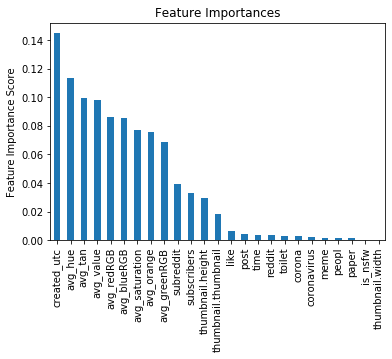

In [42]:
model_fit(gs3.best_estimator_)

In [43]:
model = gs3.best_estimator_
predictions_1 = model.predict(X_test)

In [44]:
metrics.accuracy_score(y_test, predictions_1)

0.9420708720784117

In [45]:
y_test.value_counts()

0    7529
1     429
Name: dank, dtype: int64

Seems to be a satisfying result on first inspection, but upon looking at the value counts, 94% of the test values are zeros.  It is possible that the model is simply predictinig 0 for all values.  I will use xgboost to see if I can get a better result.

In [ ]:
import xgboost as xgb

In [48]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [49]:
preds = model.predict(X_test)

In [50]:
metrics.accuracy_score(y_test, preds)

0.9453380246293038

We have an okay baseline, let us mess with the paremeters.

In [51]:
params = {'max_depth':range(1, 20, 4), 'num_parallel_tree':range(1, 6)}
model_tuning = xgb.XGBClassifier(learning_rate=0.1, random_state=42)
model_tuning.fit(X_train, y_train)
gs = gridSearch(model_tuning, param_grid=params)

In [52]:
gs.cv_results_

{'mean_fit_time': array([ 2.26513963,  3.17251101,  4.04617629,  4.953549  ,  5.80287771,
         5.96185203, 10.62897773, 15.50931416, 20.33999267, 25.3675415 ,
        10.23601947, 18.95768828, 27.83913121, 36.85402036, 46.38532543,
        14.21677084, 26.8804975 , 39.64036655, 52.29691029, 65.23610115,
        17.32664852, 33.40045781, 49.61089811, 65.85105677, 75.50463295]),
 'std_fit_time': array([1.06554485e-02, 1.74674179e-02, 1.58573864e-02, 4.95799373e-02,
        3.11167647e-02, 7.78665471e-03, 3.06081392e-02, 1.21969514e-01,
        8.13824682e-02, 2.46983063e-01, 1.11427684e-01, 1.05926628e-01,
        1.03194859e-01, 1.83435598e-01, 5.70964376e-01, 1.90710610e-01,
        1.74389435e-01, 1.36510791e-01, 3.10137776e-01, 3.16424199e-01,
        8.12497168e-02, 2.05553333e-01, 1.71580360e-01, 4.39957047e-01,
        7.86445467e+00]),
 'mean_score_time': array([0.01436224, 0.01795273, 0.02134395, 0.02333846, 0.02593279,
        0.02812757, 0.04407253, 0.06243334, 0.07918844,

In [53]:
gs.best_params_

{'max_depth': 5, 'num_parallel_tree': 3}

In [54]:
gs.best_score_

0.651335884569161

In [55]:
preds = gs.best_estimator_.predict(X_test)

In [56]:
metrics.accuracy_score(y_test, preds)

0.9465946217642623

We see some incremental improvement.  It may simply due to the large number of negative records opposed to the small number of positive records.  It may be beneficial to remove some negative records at random to close the gap.

In [65]:
y_train.value_counts()

0    15267
1      890
Name: dank, dtype: int64

In [66]:
dank_data = dank_data.drop(dank_data.index[dank_data['dank'] == 0][0:10000])

In [67]:
X, y = dank_data.drop(columns=["dank"]), dank_data["dank"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [68]:
params = {'max_depth':range(1, 20, 4), 'num_parallel_tree':range(1, 6)}
model_tuning = xgb.XGBClassifier(learning_rate=0.1, random_state=42)
model_tuning.fit(X_train, y_train)
gs = gridSearch(model_tuning, param_grid=params)

In [69]:
gs.cv_results_

{'mean_fit_time': array([ 1.3047091 ,  1.8781743 ,  2.50310507,  3.11626205,  3.71964903,
         3.85129652,  6.48844094,  9.04919195, 11.57283854, 14.1942297 ,
         5.55713196, 10.43548398, 15.40299339, 20.2783565 , 25.18821959,
         7.63298116, 14.46829743, 21.38958464, 28.41658792, 35.49884286,
         9.35637026, 17.96833558, 26.72112226, 35.53953514, 40.67140889]),
 'std_fit_time': array([0.04751106, 0.04528644, 0.09497933, 0.0577166 , 0.04462291,
        0.06233043, 0.12613452, 0.0641412 , 0.08704593, 0.13210841,
        0.03402601, 0.07090662, 0.12876513, 0.06928367, 0.09926383,
        0.03615147, 0.05820387, 0.07314474, 0.14726599, 0.13357554,
        0.03931142, 0.09051575, 0.11536876, 0.41341186, 3.95921478]),
 'mean_score_time': array([0.01196852, 0.01077266, 0.0191515 , 0.01595745, 0.01795201,
        0.01855145, 0.02513337, 0.03191509, 0.03909574, 0.0472743 ,
        0.0247345 , 0.04488053, 0.06303129, 0.07878981, 0.09075656,
        0.032515  , 0.05904636, 0.0

In [70]:
gs.best_params_

{'max_depth': 1, 'num_parallel_tree': 1}

In [71]:
gs.best_score_

0.8201940184949285

In [73]:
preds = gs.best_estimator_.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.9592099613568055

In [74]:
y_test.value_counts()

0    4228
1     430
Name: dank, dtype: int64

The results are much better.  The accuracy score suggests that the model is not guessing 'not dank' for all records.

In [75]:
model_tuning_3 = GradientBoostingClassifier(loss="deviance", learning_rate=0.2, subsample=0.8, criterion="mse", random_state=42, verbose=1.0, validation_fraction=0.1, n_estimators=80, max_features='sqrt', max_depth=7, min_samples_split=600)
model_tuning_3.fit(X_train, y_train)
param_test3 = {'max_features':range(12, 26, 2)}
gs3 = gridSearch(model_tuning_3, param_grid=param_test3)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.4579           0.1728            0.79s
         2           0.4280           0.0304            0.86s
         3           0.4009           0.0216            0.77s
         4           0.3918           0.0152            0.72s
         5           0.3684           0.0106            0.75s
         6           0.3575           0.0082            0.74s
         7           0.3546           0.0027            0.71s
         8           0.3475           0.0031            0.73s
         9           0.3366           0.0025            0.72s
        10           0.3396           0.0029            0.71s
        20           0.3128           0.0001            0.57s
        30           0.3004          -0.0014            0.47s
        40           0.2707          -0.0015            0.37s
        50           0.2441          -0.0012            0.28s
        60           0.2409          -0.0017            0.18s
       

In [76]:
gs3.cv_results_

{'mean_fit_time': array([1.91488271, 2.20530062, 2.1863534 , 2.51906166, 2.80988636,
        2.61620054, 2.67583971]),
 'std_fit_time': array([0.04834306, 0.11278946, 0.0890414 , 0.08174918, 0.09877532,
        0.08684888, 0.20848432]),
 'mean_score_time': array([0.01375914, 0.02014637, 0.01516271, 0.0181519 , 0.01695514,
        0.01197262, 0.01116977]),
 'std_score_time': array([0.00247517, 0.00671727, 0.00311604, 0.00347618, 0.00334057,
        0.00062999, 0.0023092 ]),
 'param_max_features': masked_array(data=[12, 14, 16, 18, 20, 22, 24],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_features': 12},
  {'max_features': 14},
  {'max_features': 16},
  {'max_features': 18},
  {'max_features': 20},
  {'max_features': 22},
  {'max_features': 24}],
 'split0_test_score': array([0.81156176, 0.80031597, 0.80993274, 0.81611448, 0.8209032 ,
        0.82219134, 0.81503284]),
 'split1_test_score': array

In [77]:
gs3.best_params_

{'max_features': 20}

In [80]:
gs3.best_score_

0.8179966403097622

In [82]:
model_tuning_2 = GradientBoostingClassifier(loss="exponential", learning_rate=0.2, subsample=0.8, criterion="mse", random_state=42, verbose=1.0, validation_fraction=0.1, n_estimators=20, max_features='sqrt')
model_tuning_2.fit(X_train, y_train)
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gs2 = gridSearch(model_tuning_2, param_grid=param_test2)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.5805           0.0010            0.08s
         2           0.5446           0.0397            0.10s
         3           0.5096           0.0305            0.08s
         4           0.4954           0.0195            0.08s
         5           0.4660           0.0240            0.08s
         6           0.4487           0.0171            0.07s
         7           0.4427           0.0092            0.07s
         8           0.4418           0.0008            0.07s
         9           0.4354           0.0009            0.06s
        10           0.4333           0.0043            0.06s
        20           0.3862           0.0012            0.00s
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.5648           0.0198            0.21s
         2           0.5307           0.0359            0.18s
         3           0.4985           0.0278            0.16s
      

In [83]:
gs2.cv_results_

{'mean_fit_time': array([0.28783016, 0.24574618, 0.25092893, 0.24413991, 0.33988695,
        0.43742623, 0.38376966, 0.30438333, 0.31875005, 0.31695323,
        0.4260632 , 0.44800453, 0.38577051, 0.37299728, 0.33829374,
        0.47114067, 0.38915887, 0.36761079, 0.36741433, 0.37140956,
        0.61295791, 0.52798738, 0.49627199, 0.39414864, 0.3741992 ,
        0.6213366 , 0.50744286, 0.45119629, 0.42007675, 0.38417382]),
 'std_fit_time': array([0.00766352, 0.00868729, 0.01272576, 0.01123736, 0.04483608,
        0.06399363, 0.06757921, 0.00668507, 0.02965446, 0.02226483,
        0.02023527, 0.04118123, 0.00785706, 0.02761847, 0.01343017,
        0.02021983, 0.01580341, 0.01321163, 0.01086312, 0.01697962,
        0.05018852, 0.03503192, 0.02727445, 0.01375391, 0.02450609,
        0.01872106, 0.01010076, 0.02008003, 0.01209019, 0.04331382]),
 'mean_score_time': array([0.00777869, 0.01097498, 0.0087729 , 0.00738091, 0.00857821,
        0.00997324, 0.01096997, 0.00997958, 0.00877562, 0.00

In [84]:
gs2.best_params_

{'max_depth': 5, 'min_samples_split': 400}

In [85]:
gs2.best_score_

0.8152302848825996

In [86]:
preds = gs2.best_estimator_.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.9594246457707171

In [87]:
preds = gs3.best_estimator_.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.9547015886646629

Our second gradient boosting classifier built by GridSearchCV seems to give the best results.  It would be suggested to use this model for prediction.